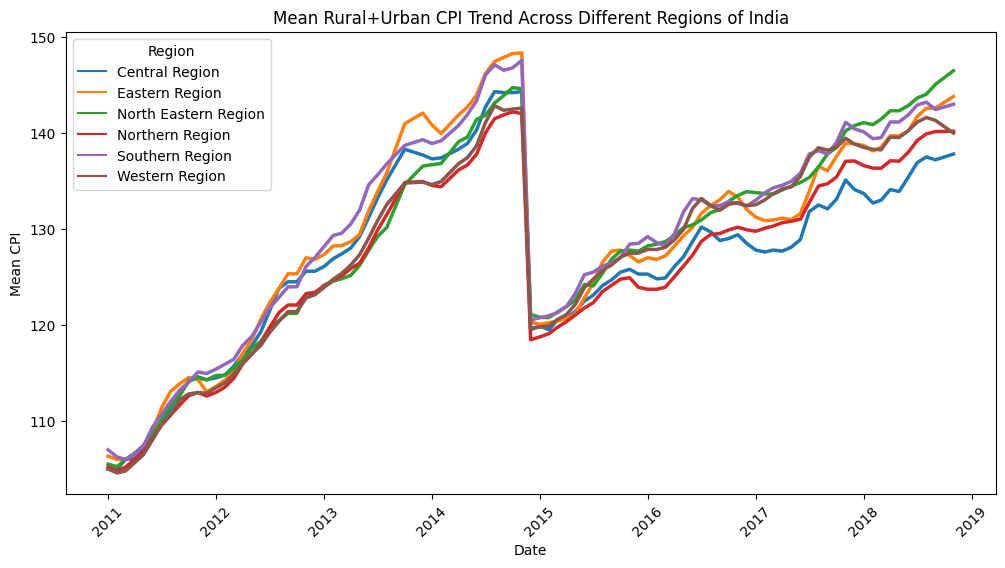

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv("urban_rural_data.csv")

# Mapping for month names
month_name_mapping = {
    "January": "Jan",
    "February": "Feb",
    "March": "Mar",
    "April": "Apr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Aug",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dec"
}
df['Name'] = df['Name'].map(month_name_mapping)

# Combine 'Year' and 'Name' columns into a single 'date' column
df['date'] = df['Year'].astype(str) + '-' + df['Name']  # Combine year and month
df['date'] = pd.to_datetime(df['date'], format='%Y-%b')  # Convert to datetime with abbreviated month name format

# Define the mapping of states to regions
state_to_region = {
    "Punjab": "Northern Region",
    "Haryana": "Northern Region",
    "Himachal Pradesh": "Northern Region",
    "Jammu and Kashmir": "Northern Region",
    "Uttar Pradesh": "Northern Region",
    "Uttarakhand":"Northern Region",
    "Kerala": "Southern Region",
    "Tamil Nadu": "Southern Region",
    "Karnataka": "Southern Region",
    "Andhra Pradesh": "Southern Region",
    "Telangana": "Southern Region",
    "Kerala":"Southern Region",
    "West Bengal": "Eastern Region",
    "Odisha": "Eastern Region",
    "Bihar": "Eastern Region",
    "Jharkhand": "Eastern Region",
    "Assam": "North Eastern Region",
    "Sikkim": "North Eastern Region",
    "Nagaland": "North Eastern Region",
    "Meghalaya": "North Eastern Region",
    "Manipur": "North Eastern Region",
    "Mizoram": "North Eastern Region",
    "Tripura": "North Eastern Region",
    "Arunachal Pradesh": "North Eastern Region",
    "Maharashtra": "Western Region",
    "Gujarat": "Western Region",
    "Rajasthan": "Western Region",
    "Goa": "Western Region",
    "Daman and Diu": "Western Region",
    "Dadar and Nagar Haveli": "Western Region",
    "Madhya Pradesh": "Central Region",
    "Chhattisgarh": "Central Region",
}

# Pivot the DataFrame to have states in rows
df_pivot = df.melt(id_vars=['date', 'Year', 'Name'], var_name='state', value_name='CPI')

# Map states to regions
df_pivot['region'] = df_pivot['state'].map(state_to_region)

# Calculate the mean CPI for each region
mean_cpi_by_region = df_pivot.groupby(['date', 'region'])['CPI'].mean().reset_index()

# Create a line plot to compare mean CPI across regions
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_cpi_by_region, x='date', y='CPI', hue='region', palette='tab10', linewidth=2.5)
plt.title("Mean Rural+Urban CPI Trend Across Different Regions of India")
plt.xlabel("Date")
plt.ylabel("Mean CPI")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Region')
plt.show()
